In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load the dataset
data = pd.read_csv("dataframe_.csv")

In [4]:
data.head()

input      output
0 -122.740667 -130.572085
1 -121.531419 -129.938929
2 -134.917019 -130.141832
3 -120.605951 -125.760932
4 -129.894781 -112.785214

In [5]:
data.shape

(1697, 2)

In [6]:
data.dtypes

input     float64
output    float64
dtype: object

In [7]:
data.isnull().sum()

input     1
output    1
dtype: int64

In [8]:
data = data.dropna(axis=0)

In [9]:
data.isnull().sum()

input     0
output    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


In [11]:
data.describe()

input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495

<AxesSubplot:xlabel='input', ylabel='output'>

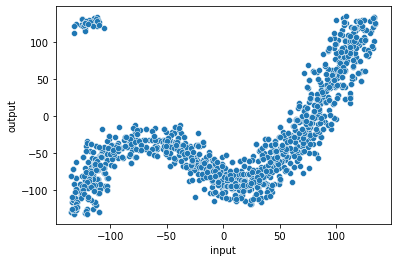

In [12]:
sns.scatterplot(x='input', y='output', data=data)

In [13]:
# Handling Outliers
# Removing the outliers using the Z-Score method
from scipy import stats
z = np.abs(stats.zscore(data))
data = data[(z < 3).all(axis=1)]

In [14]:
# Feature Engineering
# Creating a new feature using existing features
data['new_feature'] = data['input']**2

In [15]:
# Splitting the data into training and testing sets
X = data.drop('output', axis=1)
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Building the Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [18]:
print("\nLinear Regression Model Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Model Results:
Mean Squared Error: 2140.194276068908
Mean Absolute Error: 33.14556095215285
R2 Score: 0.5339508180263755


In [19]:
# Building the Random Forest Regressor Model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [20]:
print("\nRandom Forest Regressor Model Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Random Forest Regressor Model Results:
Mean Squared Error: 1448.4517976903812
Mean Absolute Error: 19.672156458582958
R2 Score: 0.6845848141030664


In [21]:
# Performing Hyperparameter Tuning on the Random Forest Regressor Model
parameters = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [2, 4, 6, 8, 10]}
rfr_grid = GridSearchCV(rfr, parameters, scoring='neg_mean_squared_error', cv=5)
rfr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [22]:
# Best parameters
print("Best Parameters:", rfr_grid.best_params_)

Best Parameters: {'max_depth': 6, 'n_estimators': 100}


In [23]:
# Predicting the values using the best parameters
y_pred = rfr_grid.predict(X_test)

In [24]:
# Evaluating the model using evaluation metrics
print("\nRandom Forest Regressor Model Results after Hyperparameter Tuning:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Random Forest Regressor Model Results after Hyperparameter Tuning:
Mean Squared Error: 1501.0951977067025
Mean Absolute Error: 22.263199330423483
R2 Score: 0.6731211755968549
